# Trend maps of GLORYS `ssh`, `u`, `v` (1993-2021)

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

In [2]:
glorys = xr.open_dataset('cmems_mod_glo_phy_my_0.083deg_P1D-m.nc')

In [3]:
glorys

<xarray.Dataset> Size: 14GB
Dimensions:    (depth: 1, latitude: 169, longitude: 337, time: 10408)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 676B 17.0 17.08 17.17 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 1kB -100.0 -99.92 -99.83 ... -72.08 -72.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 5GB ...
    uo         (time, depth, latitude, longitude) float64 5GB ...
    vo         (time, depth, latitude, longitude) float64 5GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

In [4]:
glorys.zos.sel(time=slice('2000-01-01', None))

<xarray.DataArray 'zos' (time: 7852, latitude: 169, longitude: 337)> Size: 4GB
[447194956 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 676B 17.0 17.08 17.17 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 1kB -100.0 -99.92 -99.83 ... -72.08 -72.0
  * time       (time) datetime64[ns] 63kB 2000-01-01 2000-01-02 ... 2021-06-30
Attributes:
    standard_name:  sea_surface_height_above_geoid
    units:          m
    valid_max:      5684
    unit_long:      Meters
    long_name:      Sea surface height
    valid_min:      -6228

In [28]:
gom = dict(longitude=slice(-98, -81), latitude=slice(17.5, 31))
ds = glorys.sel(**gom).isel(depth=0).drop_vars('depth')

In [29]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:    (latitude: 163, longitude: 205, time: 10408)
Coordinates:
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 3GB ...
    uo         (time, latitude, longitude) float64 3GB ...
    vo         (time, latitude, longitude) float64 3GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

In [30]:
ssh = ds.zos
u = ds.uo
v = ds.vo
eke = 0.5 * (u**2 + v**2)

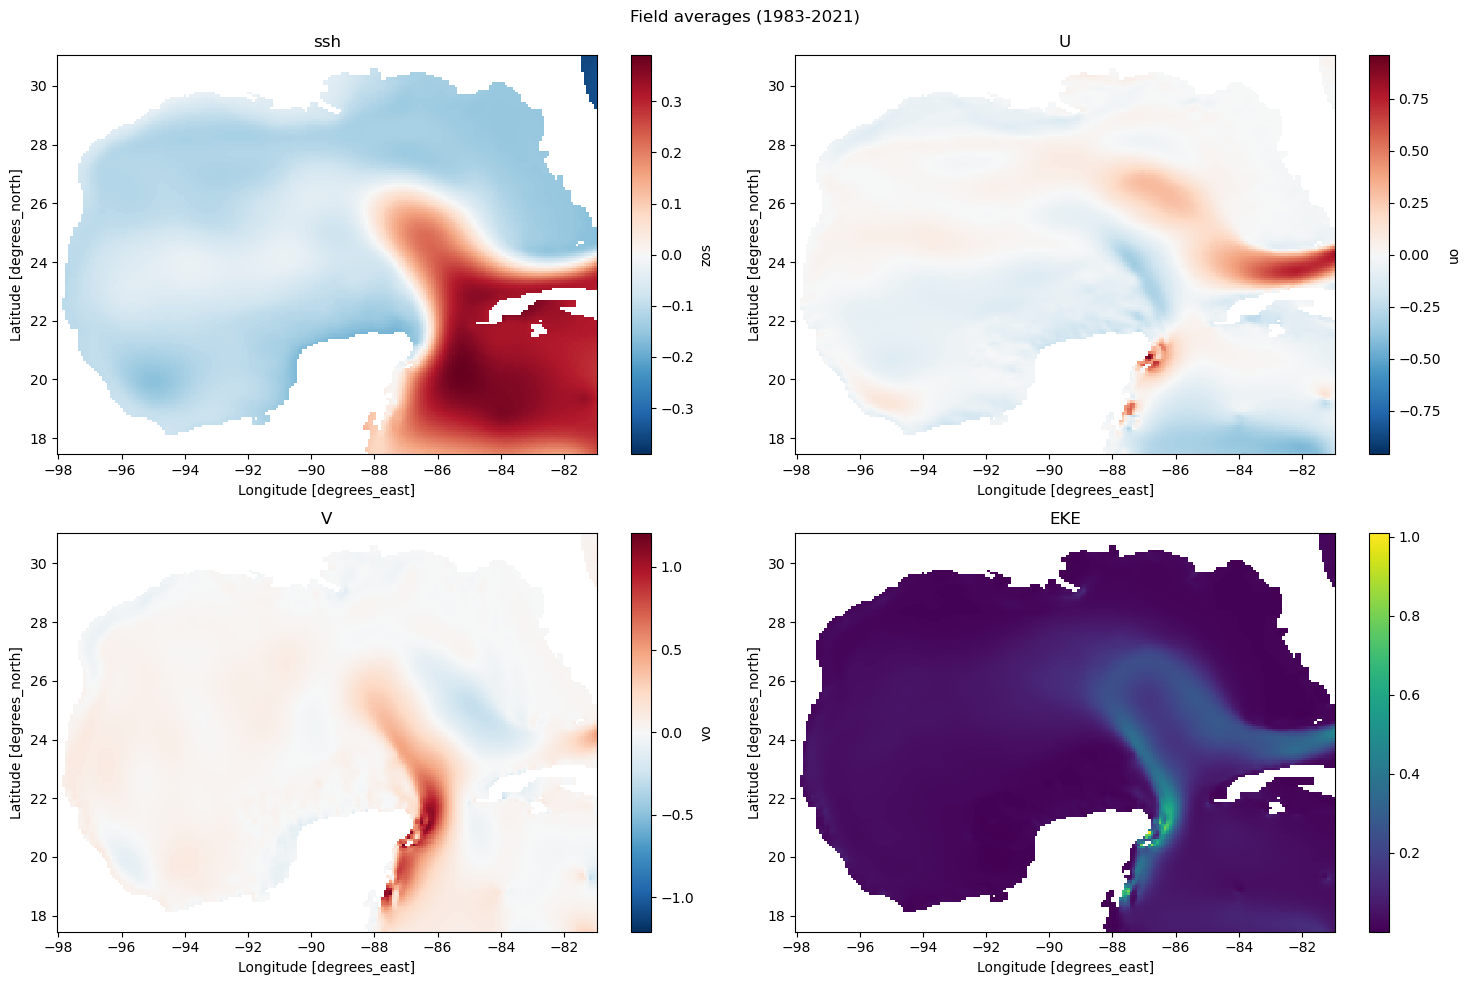

In [32]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ssh.mean('time').plot(ax=ax[0,0])
ax[0,0].set_title('ssh')
u.mean('time').plot(ax=ax[0,1])
ax[0,1].set_title('U')
v.mean('time').plot(ax=ax[1,0])
ax[1,0].set_title('V')
eke.mean('time').plot(ax=ax[1,1])
ax[1,1].set_title('EKE')
plt.suptitle('Field averages (1983-2021)')
plt.tight_layout();

In [9]:
ssh

<xarray.DataArray 'zos' (time: 10408, latitude: 163, longitude: 205)> Size: 3GB
array([[[      nan,       nan, ...,  0.176092,  0.180059],
        [      nan,       nan, ...,  0.180059,  0.184027],
        ...,
        [      nan,       nan, ..., -0.406507, -0.404675],
        [      nan,       nan, ..., -0.408643, -0.407422]],

       [[      nan,       nan, ...,  0.165716,  0.170598],
        [      nan,       nan, ...,  0.169683,  0.174871],
        ...,
        [      nan,       nan, ..., -0.237129, -0.251167],
        [      nan,       nan, ..., -0.231025, -0.245674]],

       ...,

       [[      nan,       nan, ...,  0.26368 ,  0.266732],
        [      nan,       nan, ...,  0.273446,  0.275887],
        ...,
        [      nan,       nan, ..., -0.284127, -0.290231],
        [      nan,       nan, ..., -0.283212, -0.289926]],

       [[      nan,       nan, ...,  0.257881,  0.259102],
        [      nan,       nan, ...,  0.268563,  0.268258],
        ...,
        [      nan,       nan, ..., -0.343944, -0.34608 ],
        [      nan,       nan, ..., -0.343638, -0.346385]]])
Coordinates:
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Attributes:
    standard_name:  sea_surface_height_above_geoid
    units:          m
    valid_max:      5684
    unit_long:      Meters
    long_name:      Sea surface height
    valid_min:      -6228

In [33]:
#make a list of empty data arrays for each month
mo_list = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'octo', 'nov', 'dec']

ssh_months = []
[ssh_months.append(xr.DataArray().rename(i)) for i in mo_list]

u_months = []
[u_months.append(xr.DataArray().rename(i)) for i in mo_list]

v_months = []
[v_months.append(xr.DataArray().rename(i)) for i in mo_list]

eke_months = []
[eke_months.append(xr.DataArray().rename(i)) for i in mo_list]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
#populate each month data array w var's values for each corresponding month
#e.g. take all the Januaries and put them in their own DataArray
for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    ssh_months[i] = ssh.sel(time=ssh['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    u_months[i] = u.sel(time=u['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    v_months[i] = v.sel(time=v['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    eke_months[i] = eke.sel(time=eke['time.month']==j)

In [13]:
#check that only jans are in time dim
ssh_months[0].time[740:750]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2016-01-28T00:00:00.000000000', '2016-01-29T00:00:00.000000000',
       '2016-01-30T00:00:00.000000000', '2016-01-31T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2016-01-28 2016-01-29 ... 2017-01-06
Attributes:
    standard_name:  time
    axis:           T
    unit_long:      Hours Since 1950-01-01
    long_name:      Time

In [14]:
#check if loop worked
ssh.sel(time=ssh['time.month']==1)

<xarray.DataArray 'zos' (time: 899, latitude: 163, longitude: 205)> Size: 240MB
array([[[      nan,       nan, ...,  0.176092,  0.180059],
        [      nan,       nan, ...,  0.180059,  0.184027],
        ...,
        [      nan,       nan, ..., -0.406507, -0.404675],
        [      nan,       nan, ..., -0.408643, -0.407422]],

       [[      nan,       nan, ...,  0.165716,  0.170598],
        [      nan,       nan, ...,  0.169683,  0.174871],
        ...,
        [      nan,       nan, ..., -0.237129, -0.251167],
        [      nan,       nan, ..., -0.231025, -0.245674]],

       ...,

       [[      nan,       nan, ...,  0.253914,  0.260323],
        [      nan,       nan, ...,  0.266121,  0.27131 ],
        ...,
        [      nan,       nan, ..., -0.119022, -0.131535],
        [      nan,       nan, ..., -0.114139, -0.126652]],

       [[      nan,       nan, ...,  0.267037,  0.27253 ],
        [      nan,       nan, ...,  0.278634,  0.283517],
        ...,
        [      nan,       nan, ..., -0.232246, -0.235298],
        [      nan,       nan, ..., -0.229499, -0.232551]]])
Coordinates:
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 7kB 1993-01-01 1993-01-02 ... 2021-01-31
Attributes:
    standard_name:  sea_surface_height_above_geoid
    units:          m
    valid_max:      5684
    unit_long:      Meters
    long_name:      Sea surface height
    valid_min:      -6228

## Calculate trends of each var for each month

In [36]:
from scipy.stats import linregress

In [37]:
trend_ssh = []
for i in np.arange(0,len(ssh_months)):
    trend_ssh.append(ssh_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m/yr

trend_u = []
for i in np.arange(0,len(u_months)):
    trend_u.append(u_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m/s/yr

trend_v = []
for i in np.arange(0,len(v_months)):
    trend_v.append(v_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m/s/yr

trend_eke = []
for i in np.arange(0,len(eke_months)):
    trend_eke.append(eke_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m^2/s^2/yr

In [18]:
trend_ssh[0]

<xarray.Dataset> Size: 536kB
Dimensions:               (degree: 2, latitude: 163, longitude: 205)
Coordinates:
  * degree                (degree) int64 16B 1 0
  * longitude             (longitude) float32 820B -98.0 -97.92 ... -81.08 -81.0
  * latitude              (latitude) float32 652B 17.5 17.58 ... 30.92 31.0
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 535kB nan ......

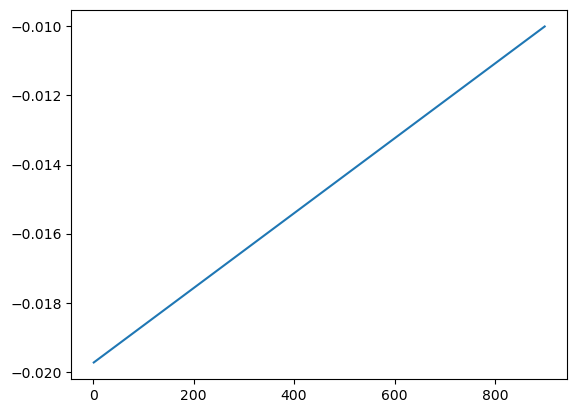

In [19]:
#get a sense of magnitude of trend slope at a single grid pt
z = np.polyfit(np.arange(1,900), u_months[0][:,100,100], 1)
p = np.poly1d(z)
plt.plot(np.arange(1,900), p(np.arange(1,900)))
#plt.plot(np.arange(1,900), u_months[0][:,100,100])

## Trend maps of each month for each variable

In [20]:
mo_titles = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plotting_func(trend_da, units, title, suptitle, vmin=None, vmax=None):
    proj = ccrs.Mercator() #with Mercator you can put lat lon values.
    fig, ax = plt.subplots(3, 4, figsize=(30, 20), subplot_kw=dict(projection=proj))

    ax = ax.ravel()
    for (i,j,k) in zip(np.arange(0,12), np.arange(0,len(trend_da)), mo_titles):
        ax[i].set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())
        ax[i].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                         edgecolor='face', facecolor='0.5'))
        da = trend_da[j].polyfit_coefficients[0]
        norm = colors.CenteredNorm()
        im = ax[i].pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                           cmap='PRGn', vmin=vmin, vmax=vmax) # norm=norm)
        cb = plt.colorbar(im, ax=ax[i], shrink=0.7, extend='both')
        cb.ax.set_title(f"{units}", fontsize=10)# labelpad=2, loc='top')
        
        g1 = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        g1.xlabels_top = False
        g1.ylabels_right = False

        left, width = .05, .5
        bottom, height = .25, .73
        right = left + width
        top = bottom + height
        #ax[i].set_title(f'{k}', horizontalalignment='left', verticalalignment='top', fontsize=26)
        ax[i].text(left, top, f'{k}', horizontalalignment='left', verticalalignment='top', 
                   fontsize=26, transform=ax[i].transAxes, color='white')
        
    plt.tight_layout()
    plt.suptitle(f'{suptitle}', y=1, fontweight='bold', fontsize=20);

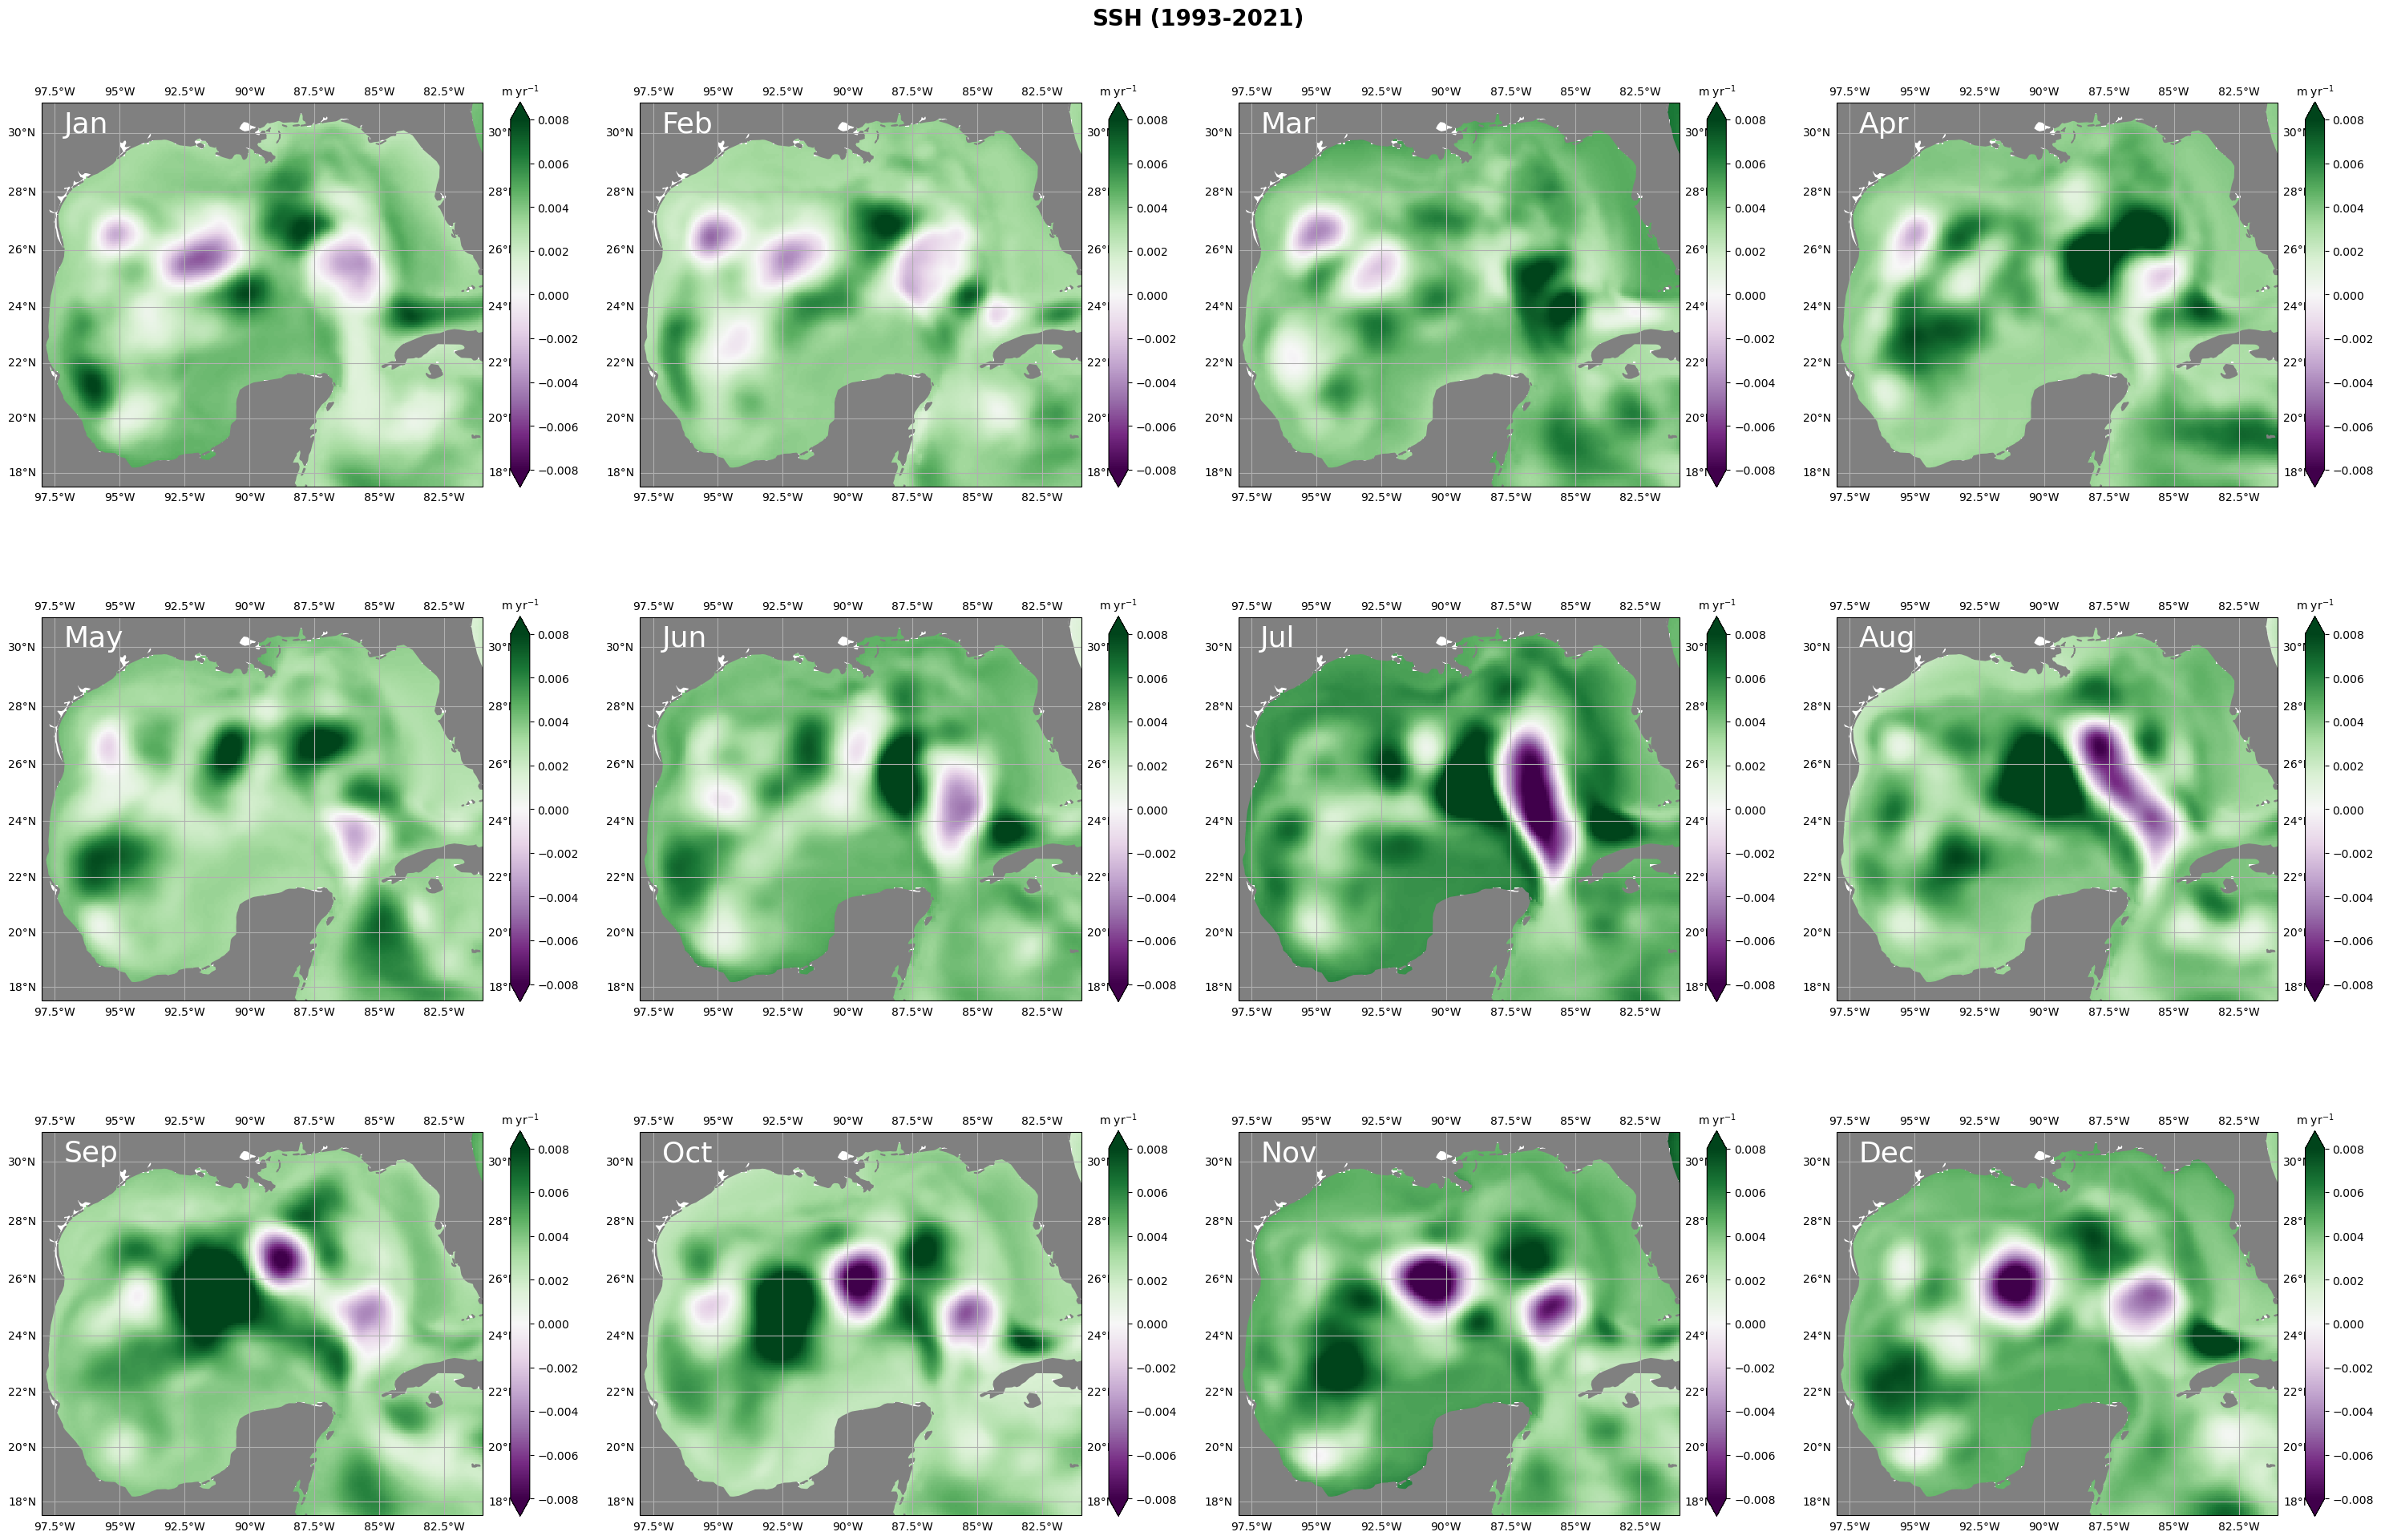

In [21]:
plotting_func(trend_ssh, units=r'm yr$^{-1}$', title=mo_titles, suptitle='SSH (1993-2021)', vmin=-8e-3, vmax=8e-3)

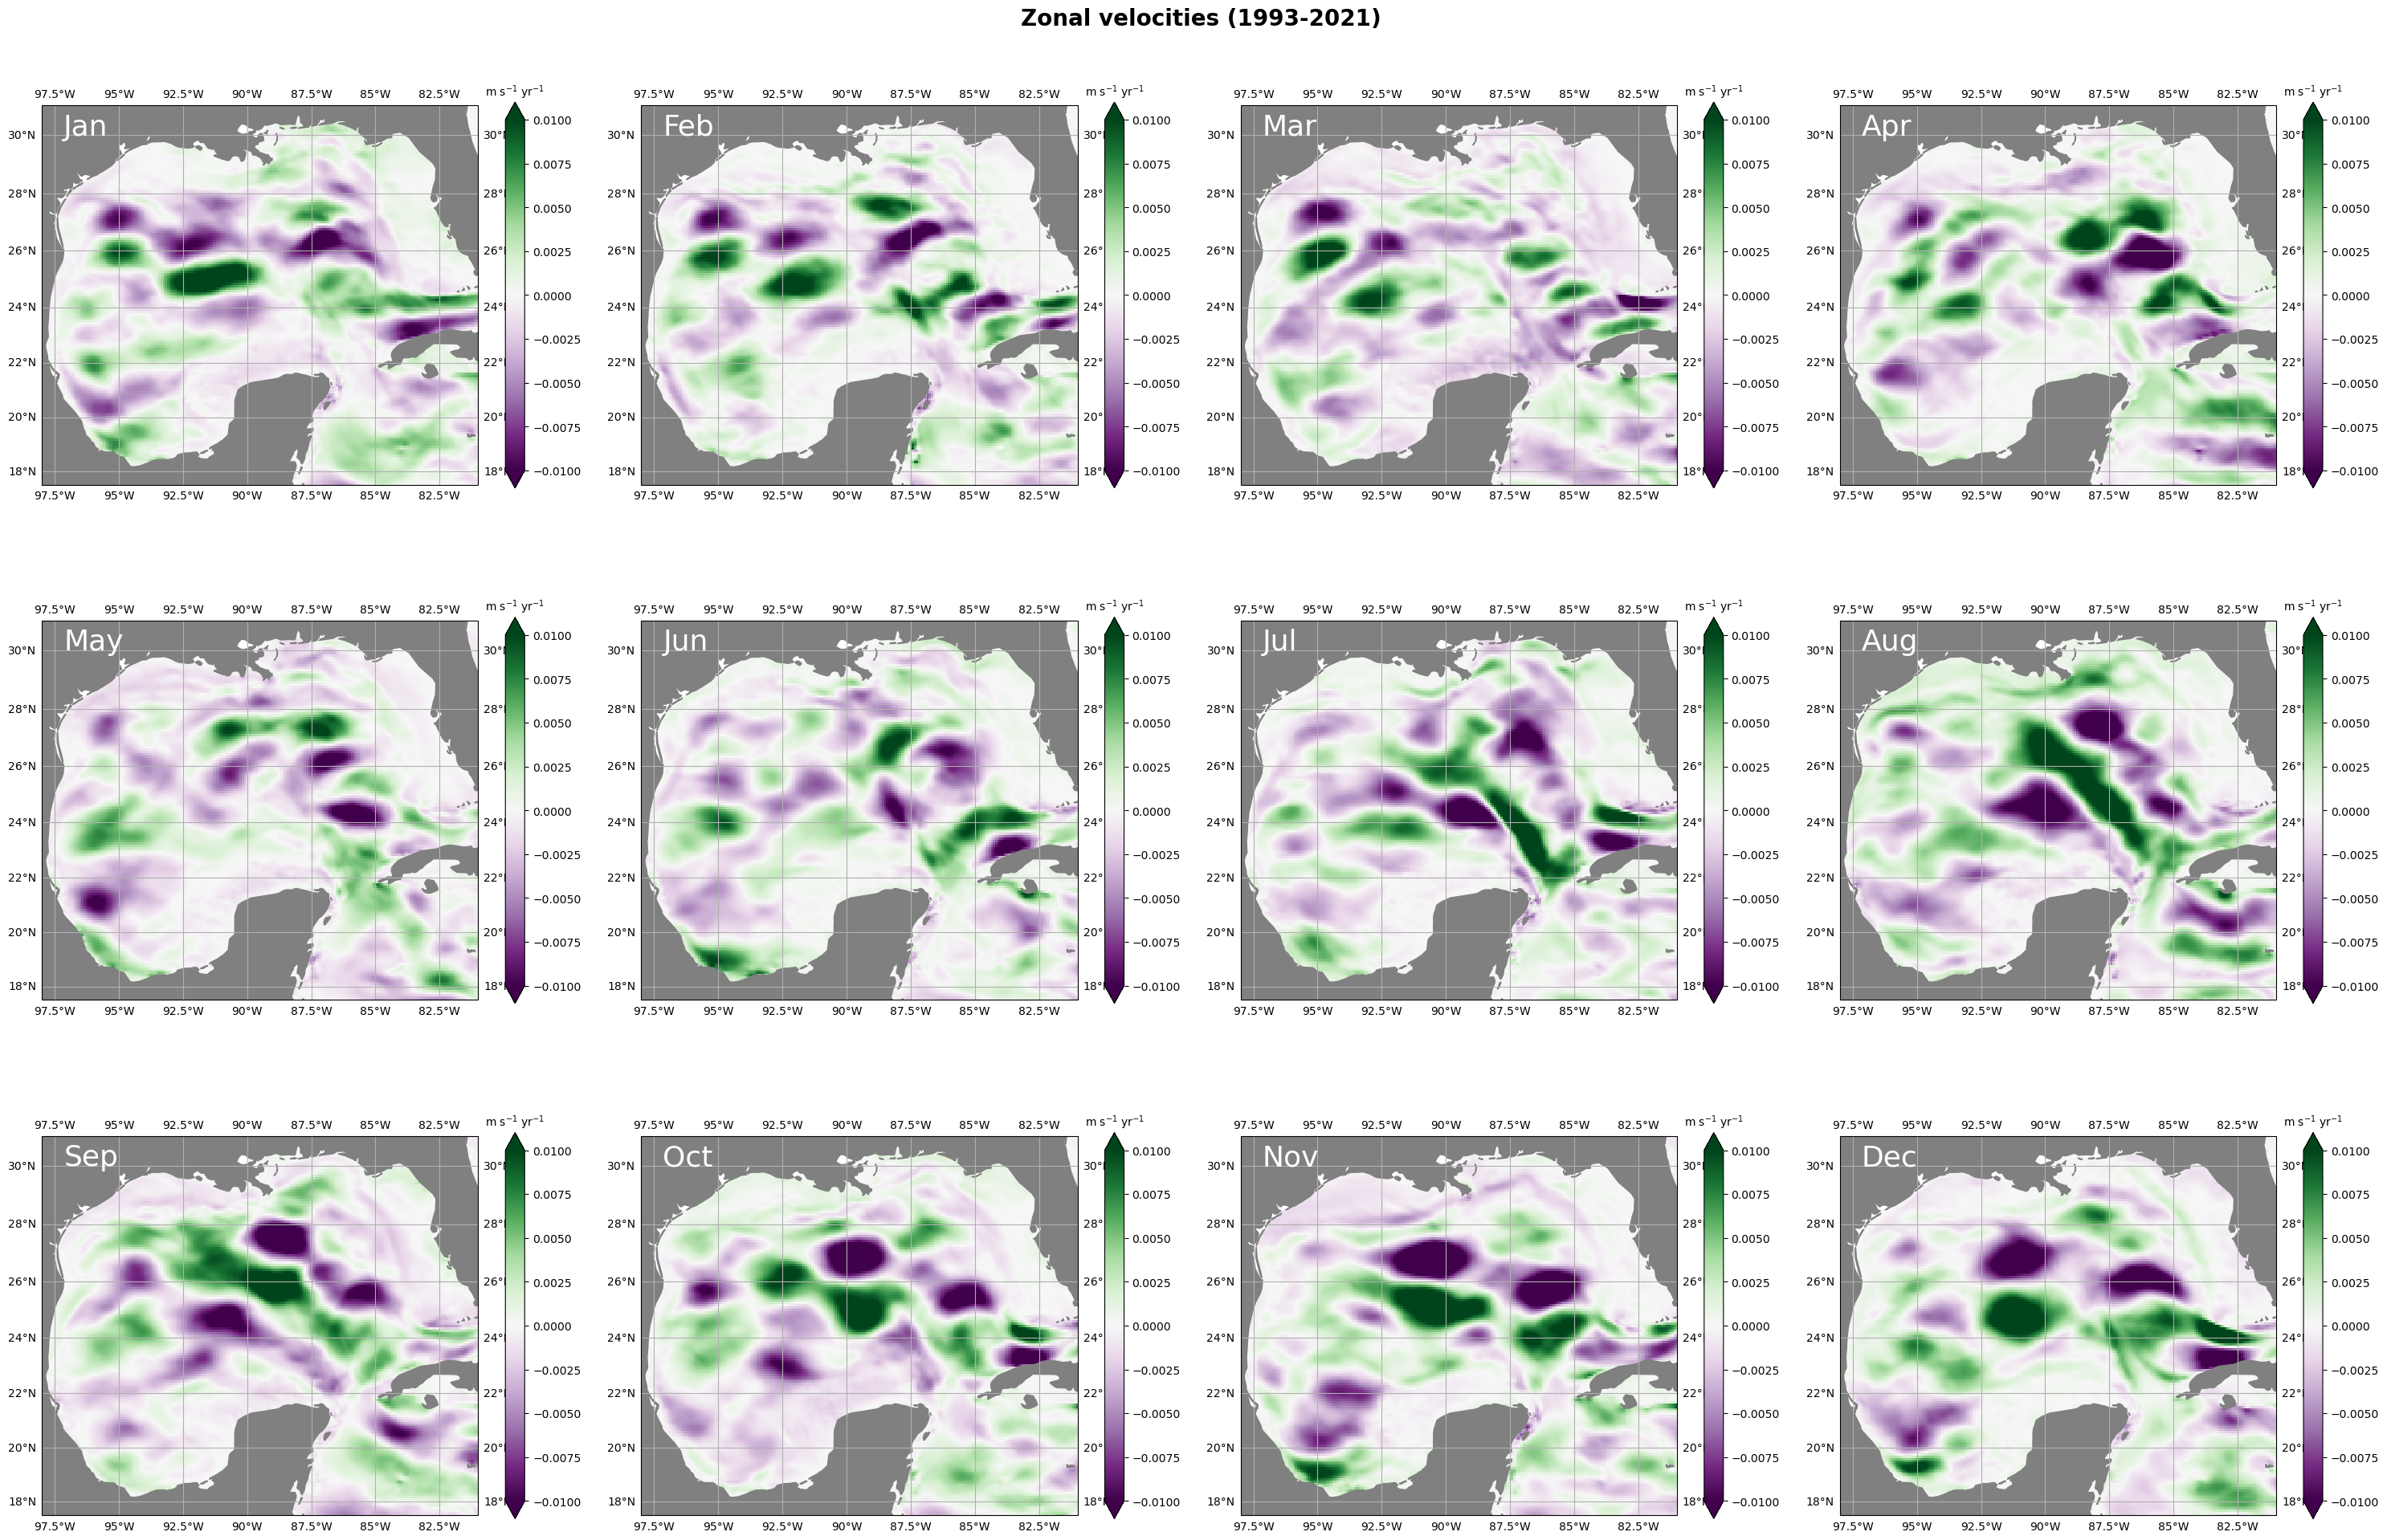

In [22]:
plotting_func(trend_u, units=r'm s$^{-1}$ yr$^{-1}$', title=mo_titles, 
              suptitle='Zonal velocities (1993-2021)', vmin=-1e-2, vmax=1e-2)

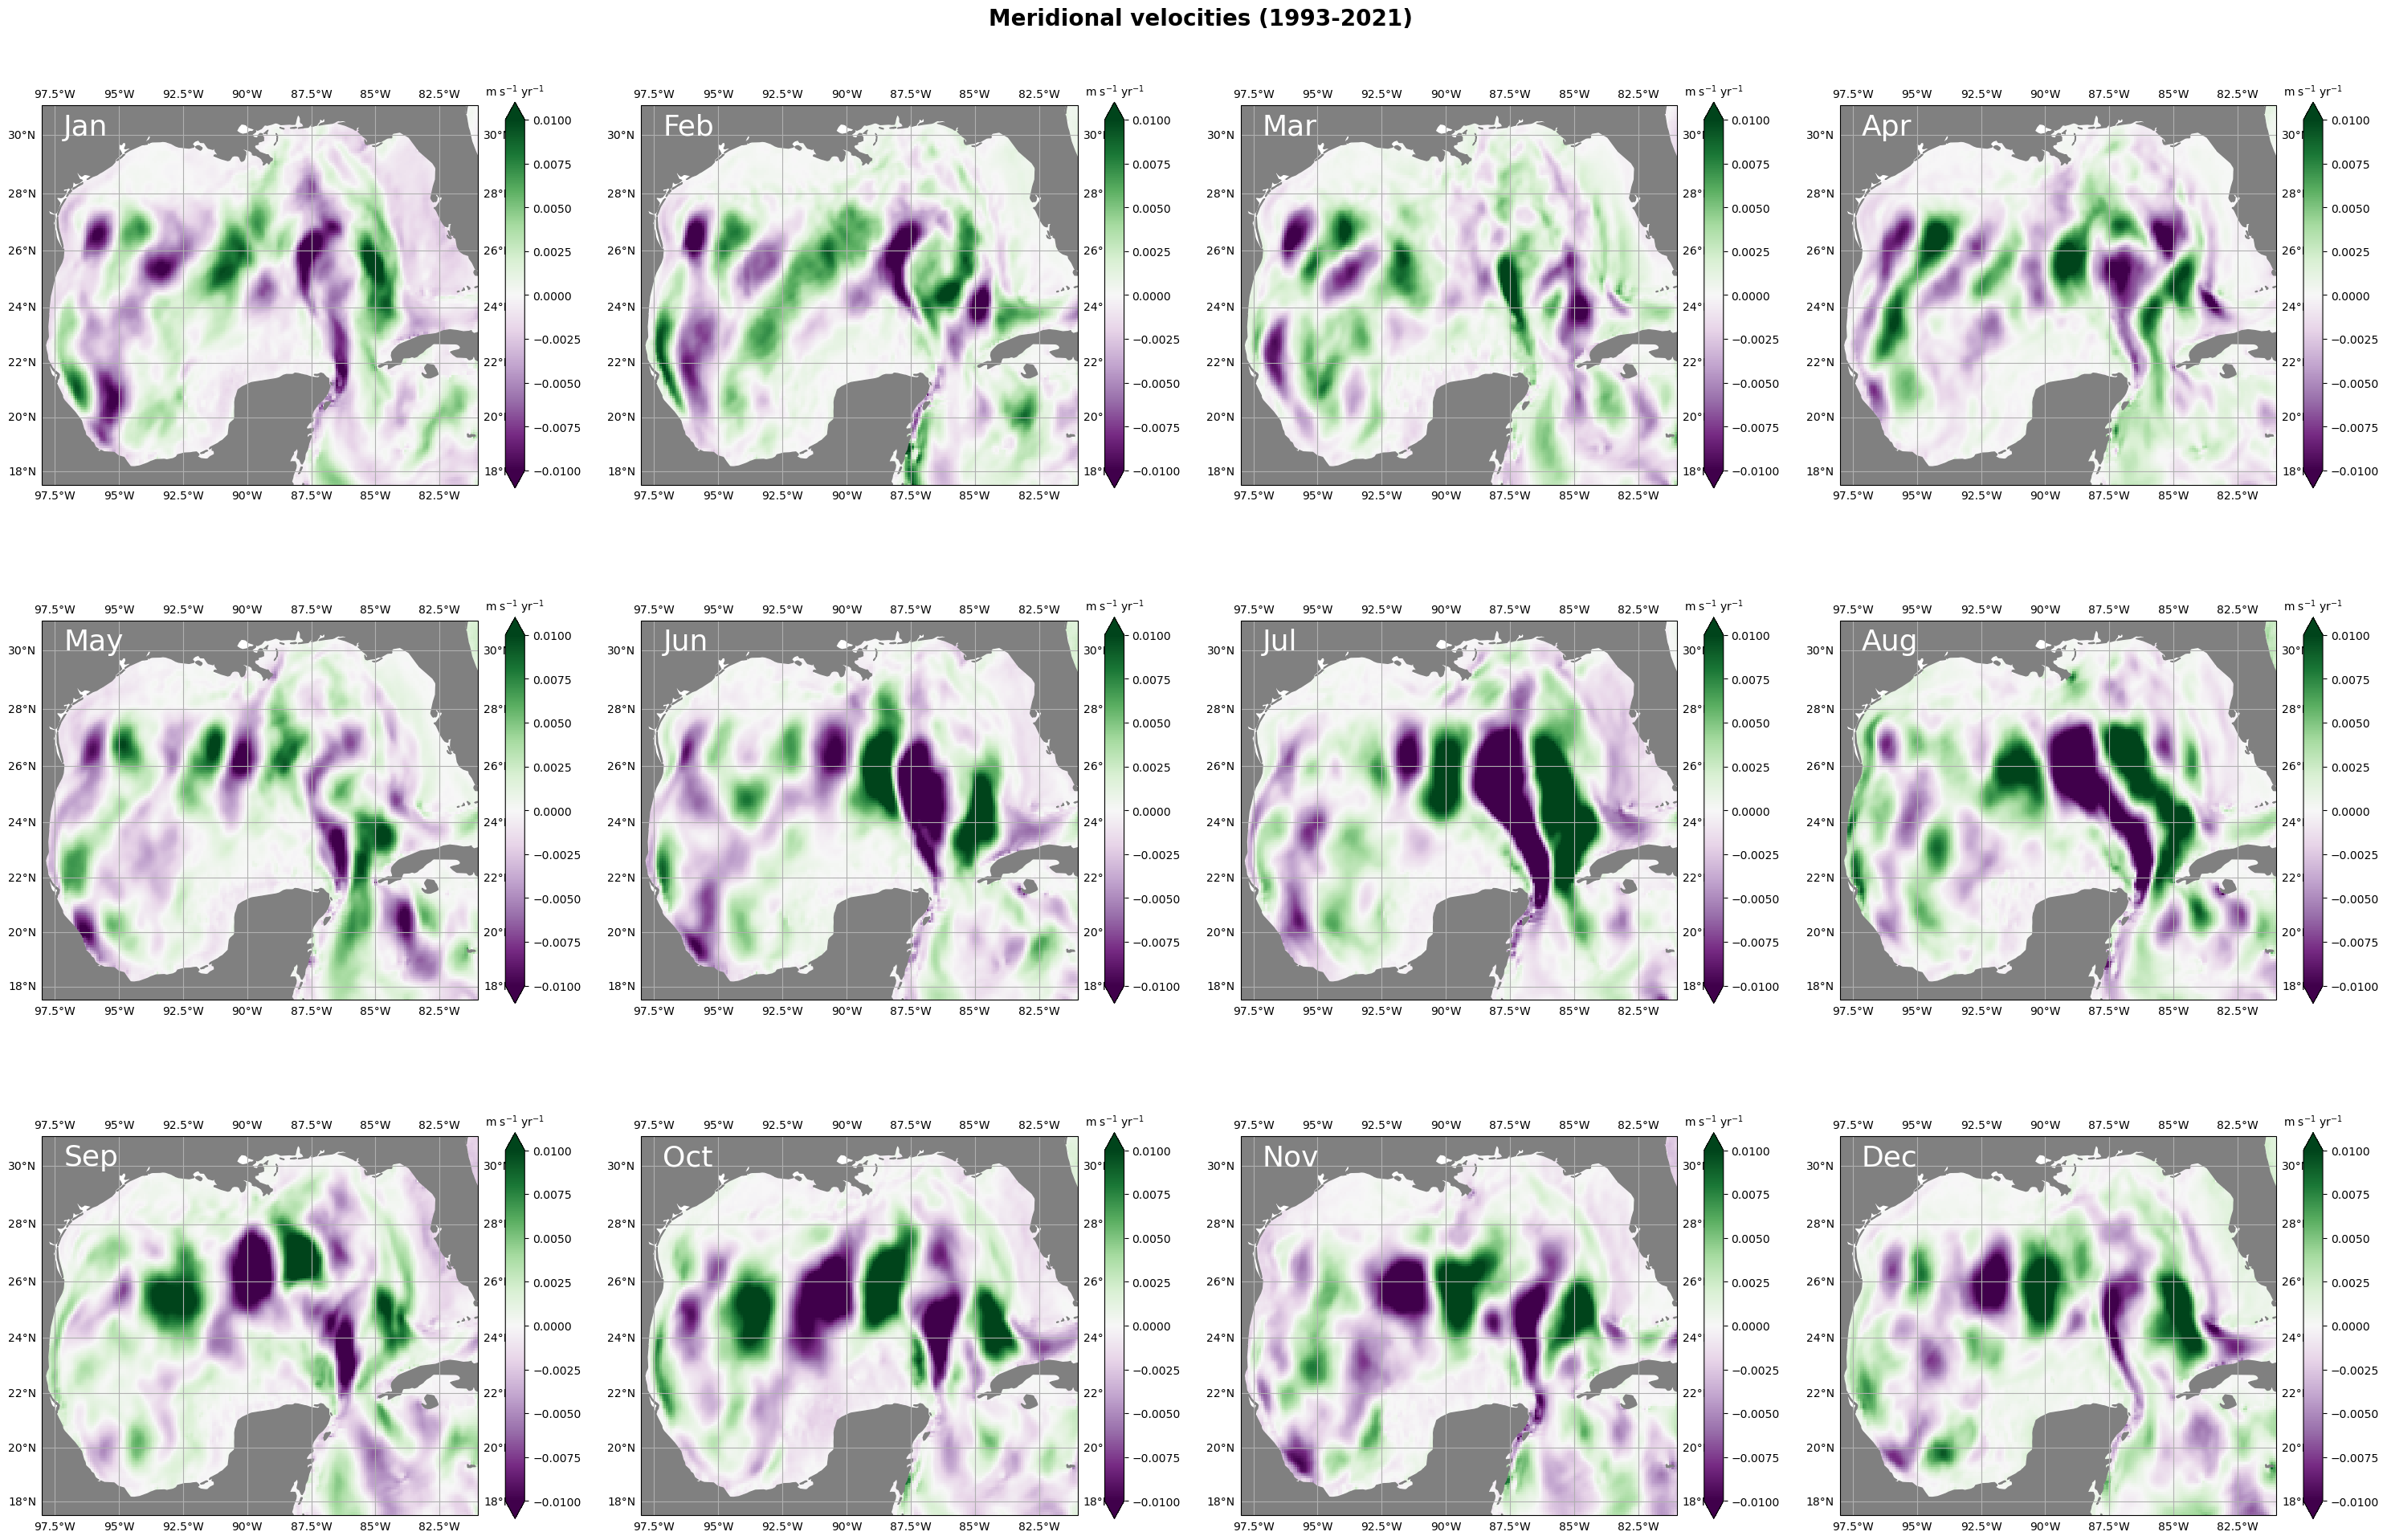

In [23]:
plotting_func(trend_v, units=r'm s$^{-1}$ yr$^{-1}$', title=mo_titles, 
              suptitle='Meridional velocities (1993-2021)', vmin=-1e-2, vmax=1e-2)

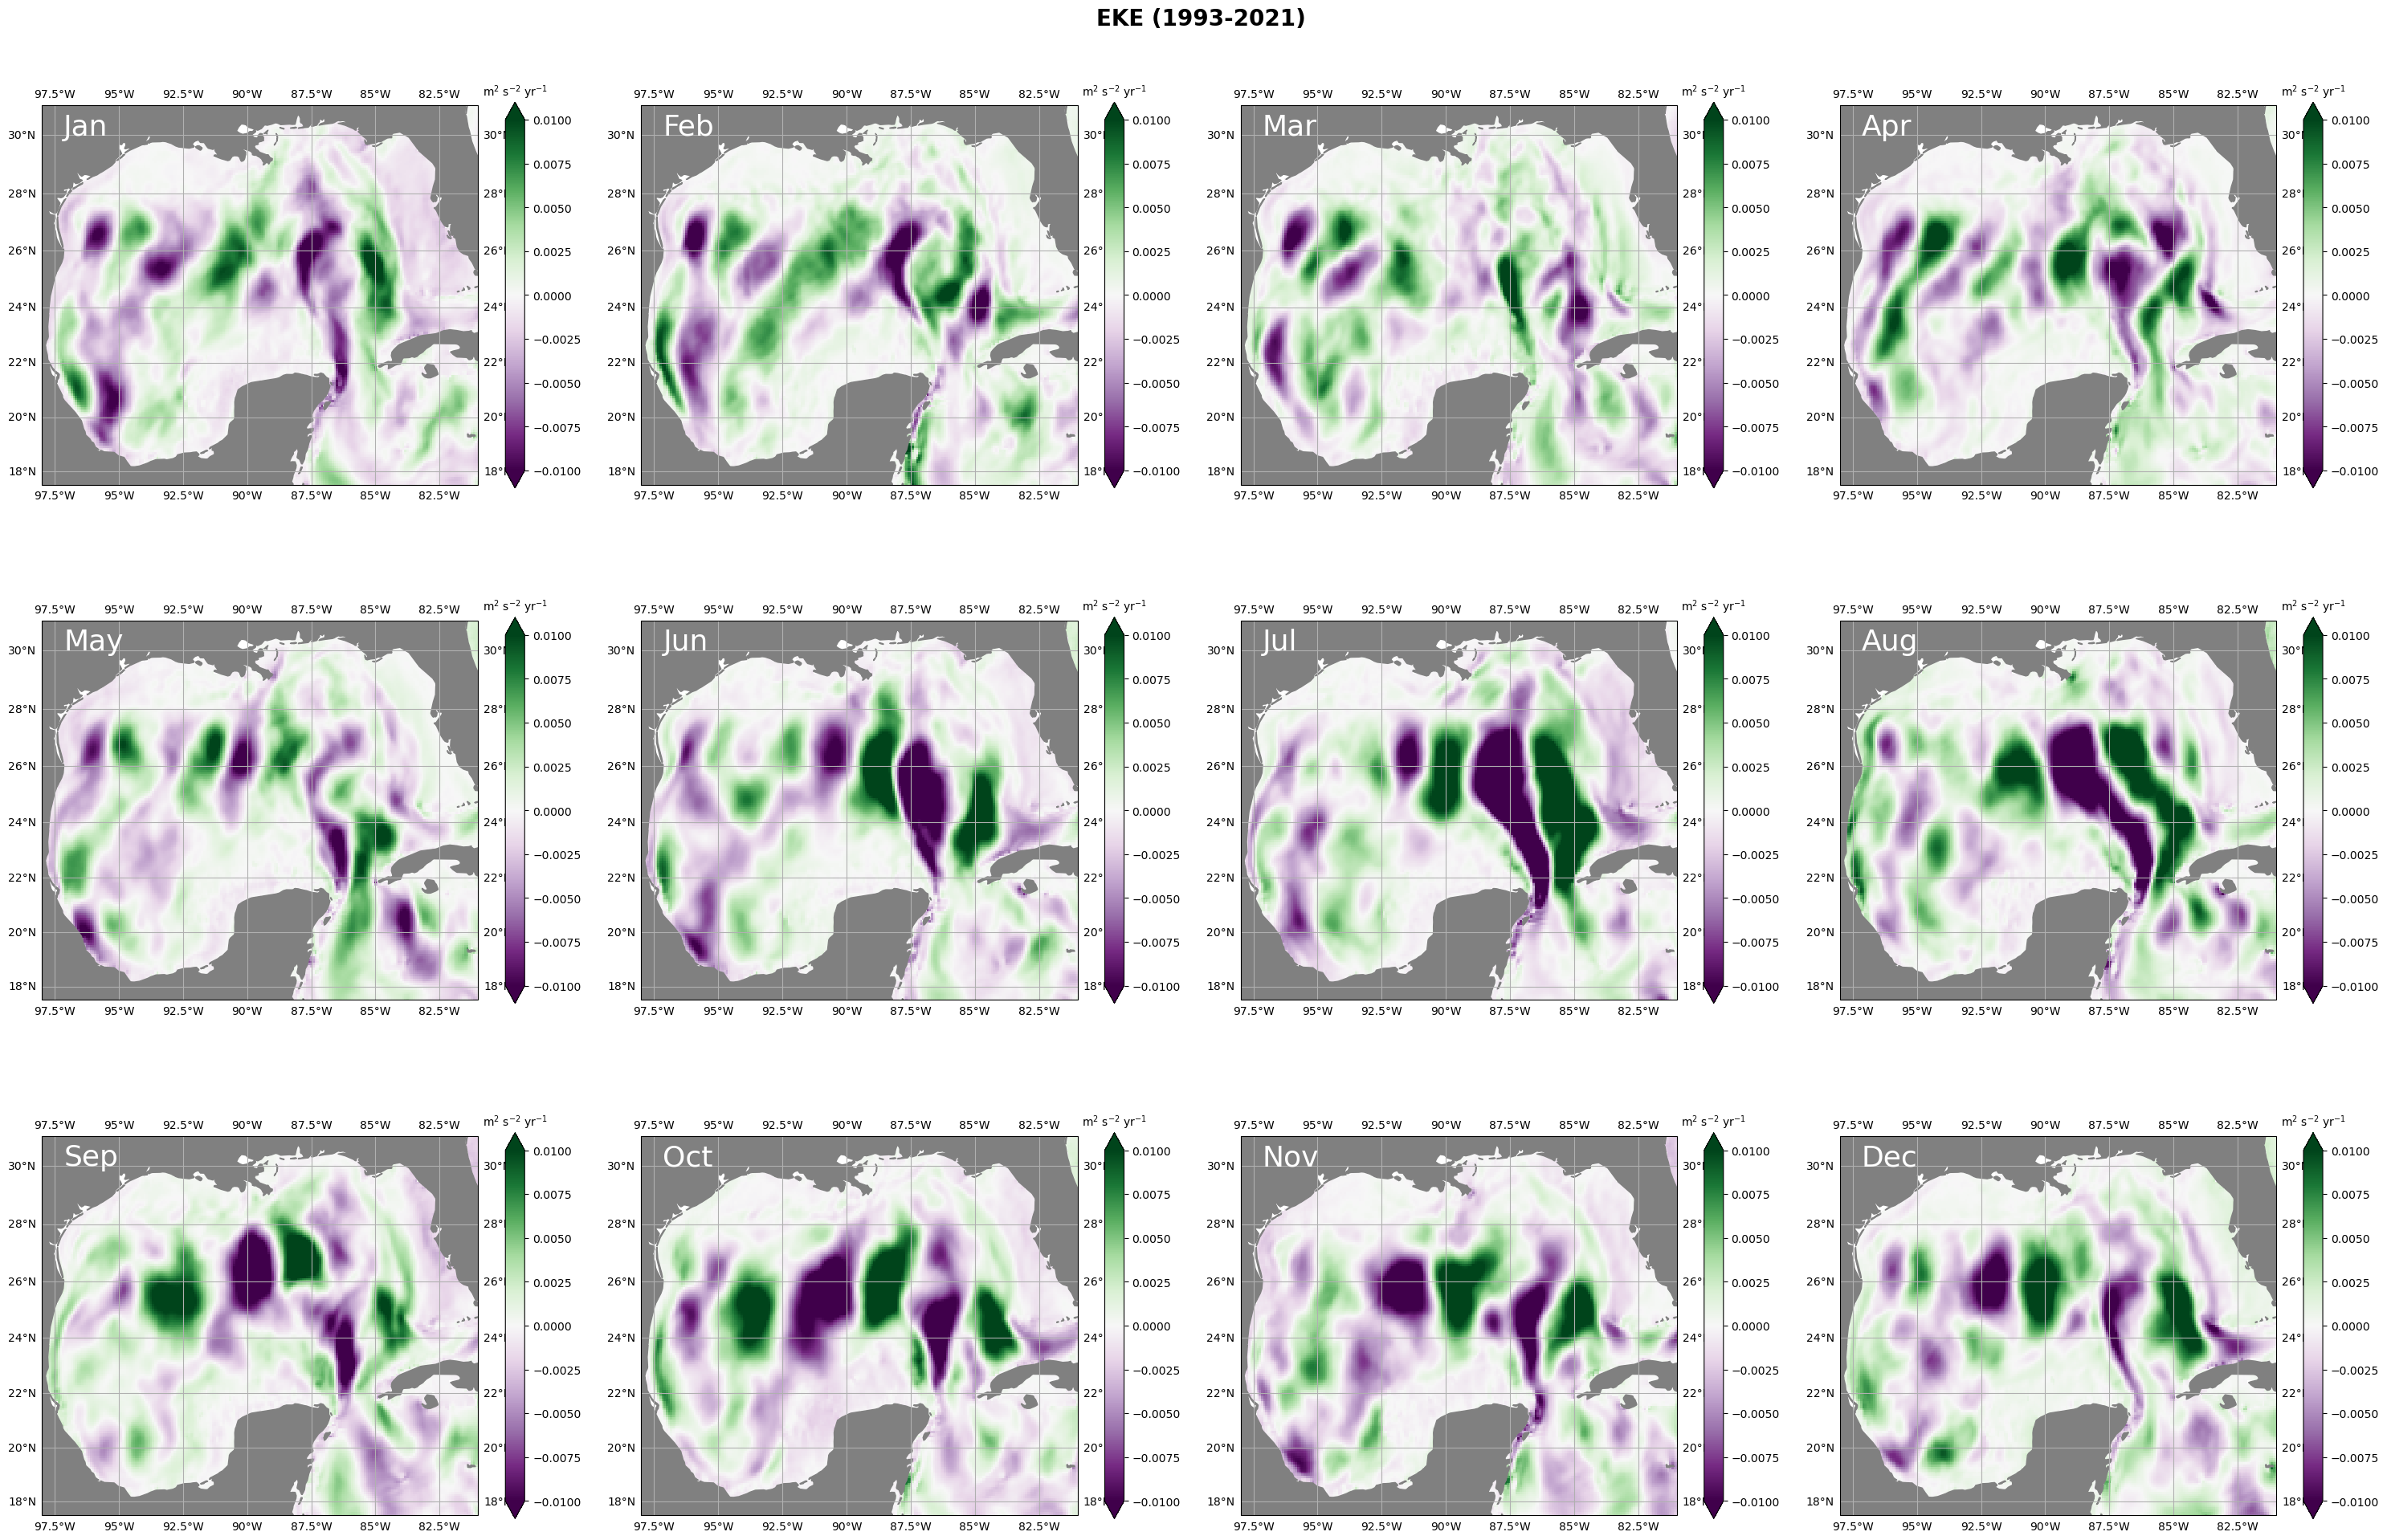

In [39]:
plotting_func(trend_eke, units=r'm$^2$ s$^{-2}$ yr$^{-1}$', title=mo_titles, 
              suptitle='EKE (1993-2021)', vmin=-1e-2, vmax=1e-2)